In [1]:
# %load_ext autoreload
# %aimport MyLibs.CoupMatrixAndMetricAnalysisFuncitons
# %aimport MyLibs.OpticalOperators
# %aimport MyLibs.ComplexPlotFunction
# %aimport MyLibs.GaussianBeamBasis
# %aimport MyLibs.GeneralFunctions
# %aimport MyLibs.SaveMaskToBinFile
# %aimport MyLibs.ModelabProcessBatchFile
# %aimport MyLibs.QuantumGateGenerator
# %aimport MyLibs.MPLCFunctions

# %autoreload 1
import os
import numpy as np
import scipy.io
import copy
import math
# from scipy.io import savemat loadmat
import matplotlib.pyplot as plt
import sys
import ipywidgets
# import ComplexPlotFunction as cmplxplt
# import AnalysisFuncitons as ProCouplMat
# Global Ploting properties and style
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [15,15]

# import MyLibs.OpticalOperators as OpticOp
# import MyLibs.ComplexPlotFunction as cmplxplt
# import MyLibs.GaussianBeamBasis as GaussBeams
# import MyLibs.GeneralFunctions as GenFuncs
# import MyLibs.CoupMatrixAndMetricAnalysisFuncitons as MetricCal
# import MyLibs.SaveMaskToBinFile as SaveMaskBin
# import MyLibs.ModelabProcessBatchFile as Modelab
# import MyLibs.QuantumGateGenerator as QGateGen
# import MyLibs.MPLCFunctions as MPLC
slash= "\\"

In [10]:
AllMasks=np.zeros((3,7,256,256),dtype=complex)

In [21]:
FullPath="Joels_FlatPhase_Xgate\\A7.mat"
FullPath="GATE_017Fa_FromJoel_NotChanged.mat"
# FullPath="Joel_ZGate_17Modes_MDL0p3_SNR24p24_NoChange.mat"


data = scipy.io.loadmat(FullPath)
MASKSCmplx = data['MASKS']
# MASKSCmplx= np.expand_dims(MASKSCmplx, axis=0)

In [22]:
MASKSCmplx.shape

(1, 7, 320, 320)

In [23]:
MaskDimsFromFile=np.shape(MASKSCmplx)
print(MaskDimsFromFile)

modeCountFromFile=MaskDimsFromFile[0]
planeCountFromFile=MaskDimsFromFile[1]
NyFromFile=MaskDimsFromFile[2]
NxFromFile=MaskDimsFromFile[3]

modeCountNew=1
Nx=256
Ny=256
# Nx=512
# Ny=512
# MaskCmplx=np.zeros((1,Dims[0],Nx_New,Ny_New),dtype=complex)
# test=MASKSCmplxTemp[:,Nx_New//2:(Nx-Nx_New//2),Ny_New//2:(Ny-Ny_New//2)]
# MaskCmplx[0,:,:,:]=test


shiftY=((NyFromFile-Ny)//2)
shiftX=((NxFromFile-Nx)//2)

MASKSCmplx=copy.deepcopy(MASKSCmplx)
MASKSCmplx_New= np.zeros([modeCountNew,planeCountFromFile,Ny,Nx],dtype=np.csingle)
for imode in range(modeCountFromFile):
    for iplane in range(planeCountFromFile):

            # MASKSCmplx_New[imode,iplane,:,:] = (MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX])
            # MASKSCmplx_New[imode,iplane,:,:] = (MASKSCmplx[imode,iplane,:,:])
            
            # MASKSCmplx_New[imode,iplane,:,:] = np.flip(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX],0)
            # MASKSCmplx_New[imode,iplane,:,:] =  np.flip(np.transpose(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX]),1)
            MASKSCmplx_New[imode,iplane,:,:] = np.rot90(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX],k=-1)
      

(1, 7, 320, 320)


In [24]:
AllMasks[0,:,:,:]=MASKSCmplx_New[0,:,:,:]

In [25]:
output_path = "AllGateMasks.mat"  # Specify the output file path
array_to_save = AllMasks  # Replace with the array you want to save

scipy.io.savemat(output_path, {'MASKS': array_to_save})

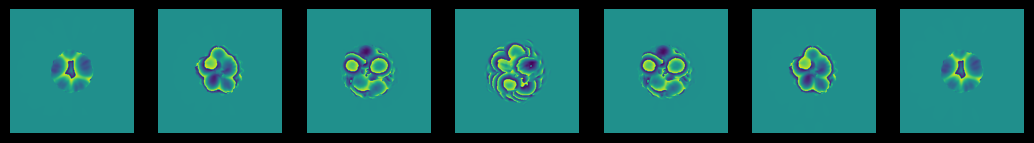

In [5]:
plt.figure()
for iplane in range(7):
    # MASKSCmplx[imask,(iplane),:,:]=np.transpose(MASKSCmplx[imask,(iplane),:,:])
    # MASKSCmplx[(iplane),:,:]=np.flip(MASKSCmplx[(iplane),:,:],axis=0)
    plt.subplot(1,8,iplane+1)
    # plt.imshow(np.angle((MASKSCmplx[11,(-1*iplane)-1,:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
    # plt.imshow(np.angle((MASKSCmplx[(iplane),:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
    plt.imshow(np.angle((MASKSCmplx[0,(iplane),:,:])),cmap='viridis')
    
    plt.axis('off')

In [ ]:
#Read MASKS in
# FolderName='MasksBinaryFiles'
# MaskFileNamePrefix='Spiral-1to1_Best_MASK'
# MASKSCmplx=SaveMaskBin.ReadMaskFromBinFile(Nx,Ny,modeCount,planeCount,FolderName,MaskFileNamePrefix)

FolderName='MasksBinaryFiles'+slash
# XGATE_021
# MaskFileNamePrefix='LGAzimuthal100.mat'
maskCount=3
Nx=256
Ny=256
planeCount=7

MaskFileNamePrefix=np.array(maskCount,dtype=str)
MaskFileNamePrefix=np.array(["FGATE_021.mat","XGATE_021.mat","ZGATE_021.mat"])

# MaskFileNamePrefix[0]="FGATE_021.mat"
# MaskFileNamePrefix[1]="XGATE_021.mat"
# MaskFileNamePrefix[2]="ZGATE_021.mat"
GateName="ZGate"
MASKSCmplxTempResized=np.zeros([planeCount,Ny,Nx],dtype=np.csingle)
MASKSCmplx=np.zeros([maskCount,planeCount,Ny,Nx],dtype=np.csingle)
MASKSPhaseComplx=np.zeros([maskCount,planeCount,Ny,Nx],dtype=np.csingle)


for imask in range(maskCount):
    PathName=FolderName+MaskFileNamePrefix[imask]
    # print(PathName)
    data_mat=scipy.io.loadmat(PathName)
    MASKSCmplxTemp=data_mat["MASKS"].astype(np.csingle)  
    print(type(MASKSCmplxTemp[0,0,0]))
    DimsMaskFromFile=(np.shape(MASKSCmplxTemp))
    NyOld=DimsMaskFromFile[1]
    NxOld=DimsMaskFromFile[2]
    NyDiff=int((NyOld-Ny)/2);
    NxDiff=int((NxOld-Nx)/2);
    if(NyDiff+NyDiff>0):
        MASKSCmplxTempResized[:,:,:]=MASKSCmplxTemp[:,NxDiff:(NxOld-NxDiff),NyDiff:(NyOld-NyDiff)];
    else:
        MASKSCmplxTempResized=MASKSCmplxTemp
    # imodeMid=50
    # imodeStart=imodeMid-10
    # imodeEnd=imodeMid+10+1
    # MASKSCmplx=MASKSCmplxTemp[imodeStart:imodeEnd,:,:,:]
    MASKSCmplx[imask,:,:,:]=MASKSCmplxTempResized.reshape(1,planeCount,Ny,Nx)

    plt.figure(imask)
    for iplane in range(planeCount):
        # MASKSCmplx[imask,(iplane),:,:]=np.transpose(MASKSCmplx[imask,(iplane),:,:])
        MASKSCmplx[0,(iplane),:,:]=np.flip(MASKSCmplx[0,(iplane),:,:],axis=0)
        plt.subplot(1,8,iplane+1)
        # plt.imshow(np.angle((MASKSCmplx[11,(-1*iplane)-1,:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
        plt.imshow(np.angle((MASKSCmplx[imask,(iplane),:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
        plt.axis('off')
        
        
    MASKSPhaseComplx[imask,:,:]=np.exp(1j*np.angle(MASKSCmplx[imask,:,:]));
#     plt.figure(1)
# for iplane in range(planeCount):
#     plt.subplot(1,8,iplane+1)
#     # plt.imshow(np.angle((MASKSCmplx[11,(-1*iplane)-1,:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
#     plt.imshow(np.angle((MASKSCmplxPhaseShifted[20,(iplane),:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
    
#     plt.axis('off')
print(np.shape(MASKSCmplx))

In [27]:
filename=[
'Qudits_d_2_LGGroup1_XGate_offset2510_Best_MASK.mat',
'Qudits_d_2_LGGroup1_ZGate_offset7510_Best_MASK.mat',
'Qudits_d_3_LGGroup2_XGate_offset2510_Best_MASK.mat',
'Qudits_d_3_LGGroup2_ZGate_offset7510_Best_MASK.mat',
'Qudits_d_4_LGGroup3_XGate_offset3512_Best_MASK.mat',
'Qudits_d_4_LGGroup3_ZGate_offset7510_Best_MASK.mat',
'Qudits_d_5_LGGroup4_XGate_offset5010_Best_MASK.mat',
'Qudits_d_5_LGGroup4_ZGate_offset7510_Best_MASK.mat',
'Qudits_d_6_LGGroup5_XGate_offset5010_Best_MASK.mat',
'Qudits_d_6_LGGroup5_ZGate_offset7510_Best_MASK.mat',
'Qudits_d_7_LGGroup6_XGate_offset50100p1_Best_MASK.mat',
'Qudits_d_7_LGGroup6_ZGate_offset7510_Best_MASK.mat',
'Qudits_d_8_LGGroup7_XGate_offset50100p1_Best_MASK.mat',
'Qudits_d_8_LGGroup7_ZGate_offset7510_Best_MASK.mat',
'Qudits_d_9_LGGroup8_XGate_offset50100p1_Best_MASK.mat',
'Qudits_d_9_LGGroup8_ZGate_offset7510_Best_MASK.mat'
]

MPLC_MASK\Qudits_d_2_LGGroup1_XGate_offset2510_Best_MASK.mat
MPLC_MASK\Qudits_d_2_LGGroup1_ZGate_offset7510_Best_MASK.mat
MPLC_MASK\Qudits_d_3_LGGroup2_XGate_offset2510_Best_MASK.mat
MPLC_MASK\Qudits_d_3_LGGroup2_ZGate_offset7510_Best_MASK.mat
MPLC_MASK\Qudits_d_4_LGGroup3_XGate_offset3512_Best_MASK.mat
MPLC_MASK\Qudits_d_4_LGGroup3_ZGate_offset7510_Best_MASK.mat
MPLC_MASK\Qudits_d_5_LGGroup4_XGate_offset5010_Best_MASK.mat
MPLC_MASK\Qudits_d_5_LGGroup4_ZGate_offset7510_Best_MASK.mat
MPLC_MASK\Qudits_d_6_LGGroup5_XGate_offset5010_Best_MASK.mat
MPLC_MASK\Qudits_d_6_LGGroup5_ZGate_offset7510_Best_MASK.mat
MPLC_MASK\Qudits_d_7_LGGroup6_XGate_offset50100p1_Best_MASK.mat
MPLC_MASK\Qudits_d_7_LGGroup6_ZGate_offset7510_Best_MASK.mat
MPLC_MASK\Qudits_d_8_LGGroup7_XGate_offset50100p1_Best_MASK.mat
MPLC_MASK\Qudits_d_8_LGGroup7_ZGate_offset7510_Best_MASK.mat
MPLC_MASK\Qudits_d_9_LGGroup8_XGate_offset50100p1_Best_MASK.mat
MPLC_MASK\Qudits_d_9_LGGroup8_ZGate_offset7510_Best_MASK.mat


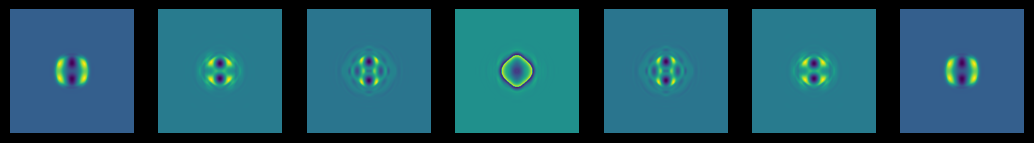

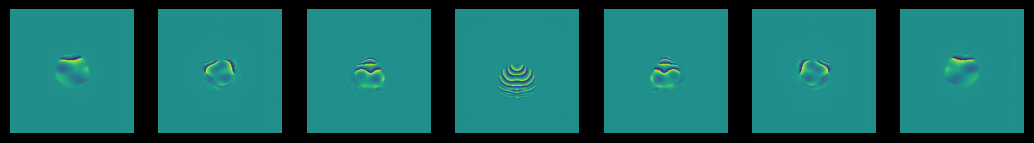

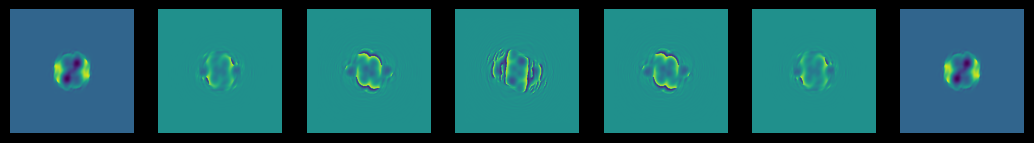

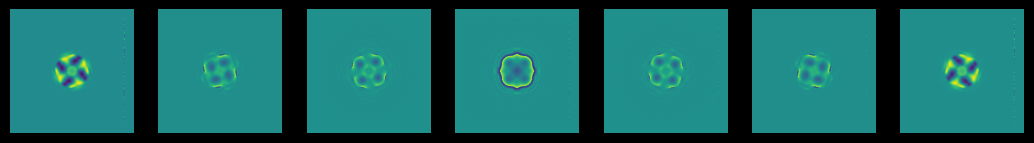

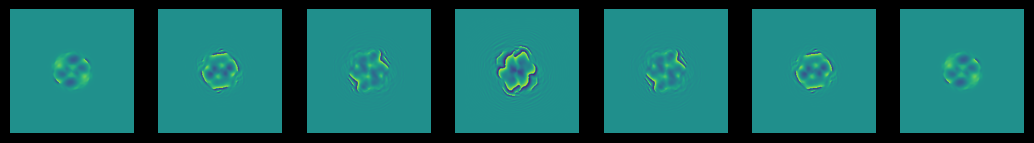

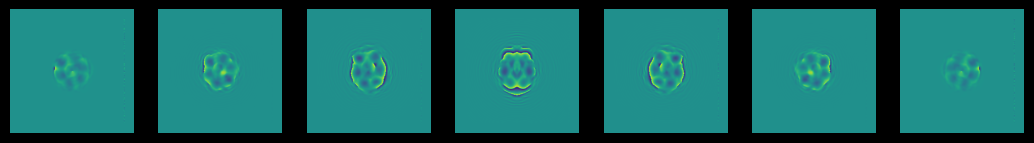

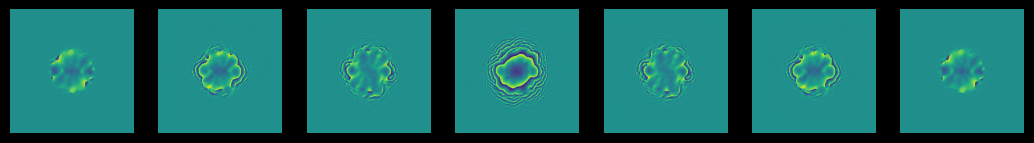

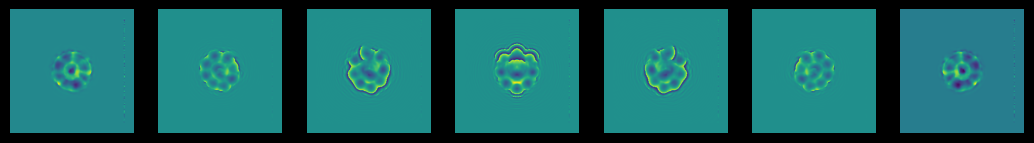

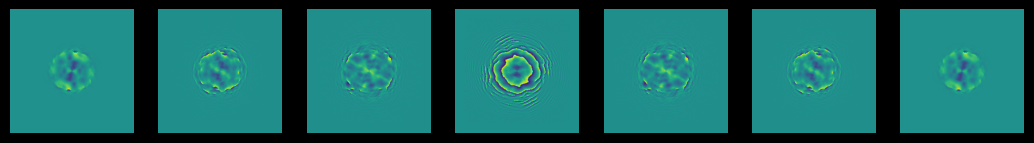

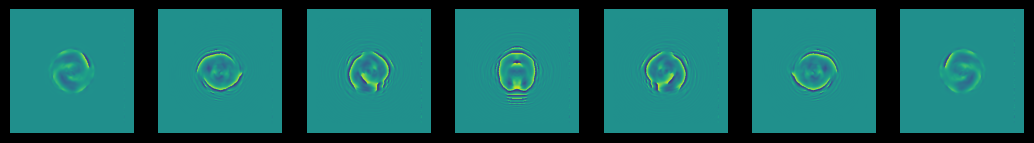

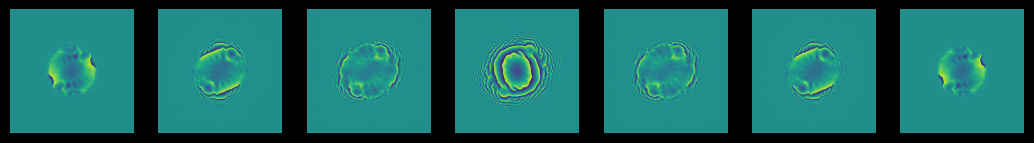

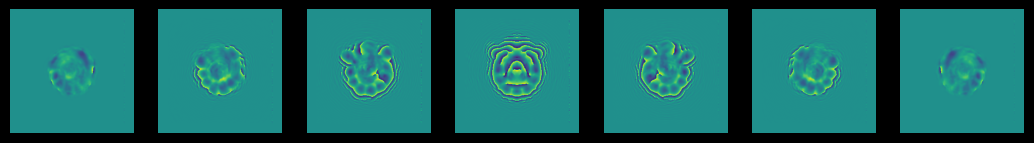

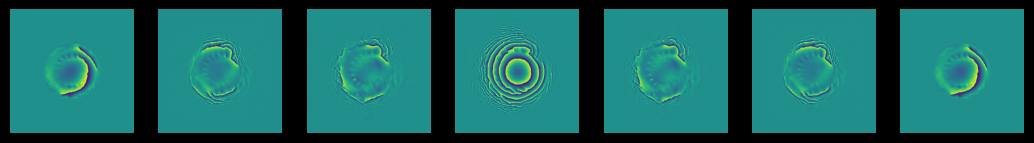

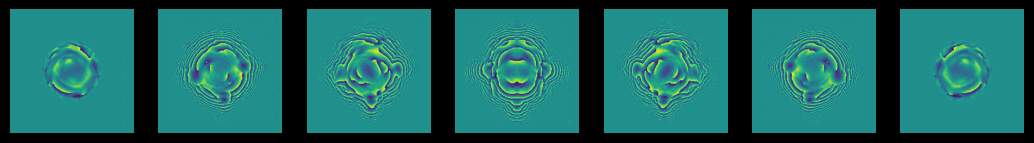

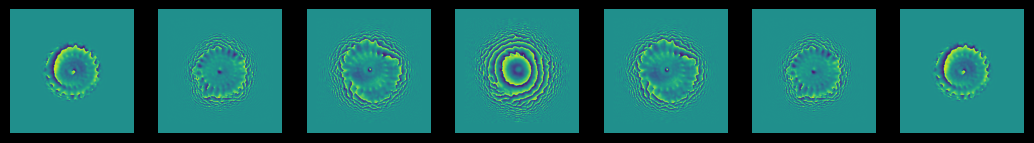

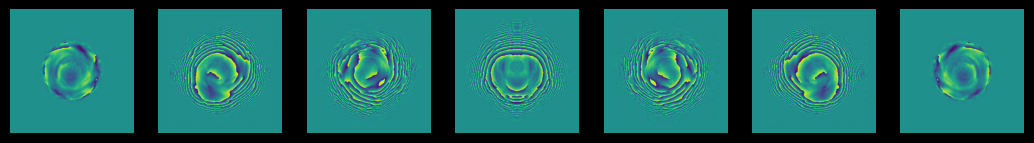

In [37]:
totalMasks=len(filename)
planeCount=7
modeCount=totalMasks
Nx=256  
Ny=256

# MASKSCmplxTempResized=np.zeros([planeCount,Ny,Nx],dtype=np.csingle)
MASKSCmplx_New=np.zeros([modeCount,planeCount,Ny,Nx],dtype=np.csingle)

# MASKSPhaseComplx=np.zeros([maskCount,planeCount,Ny,Nx],dtype=np.csingle)
Nxfile=320
Nyfile=320

xshift=(Nxfile-Nx)//2
yshift=(Nyfile-Ny)//2

xmin=xshift
xmax=Nxfile-xshift

ymin=yshift
ymax=Nyfile-yshift

for imode in range(totalMasks):
    FullPath="MPLC_MASK\\"+filename[imode]
    print(FullPath)
    data = scipy.io.loadmat(FullPath)
    MASKSCmplxFromFile = data['MASKS']
    
    # for imode in range(modeCount):
    plt.figure(imode)
    
    for iplane in range(planeCount):
        MASKSCmplx_New[imode,iplane,:,:] = np.copy(MASKSCmplxFromFile[0,iplane,ymin:ymax,xmin:xmax])
        plt.subplot(1,8,iplane+1)
        plt.imshow(np.angle((MASKSCmplxFromFile[0,(iplane),:,:])),cmap='viridis')
        plt.axis('off')
            # MASKSCmplx_New[imode,iplane,:,:] = (MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX])
            # MASKSCmplx_New[imode,iplane,:,:] = (MASKSCmplx[imode,iplane,:,:])
            
            # MASKSCmplx_New[imode,iplane,:,:] = np.flip(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX],0)
            # MASKSCmplx_New[imode,iplane,:,:] =  np.flip(np.transpose(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX]),1)
            # MASKSCmplx_New[imode,iplane,:,:] = np.rot90(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX],k=-1)
            # MASKSCmplx_New[imode,iplane,:,:] = (MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX])
            
            

In [38]:
scipy.io.savemat("XGatesZGates_d2_To_d9.mat", {"MASKS": MASKSCmplx_New})

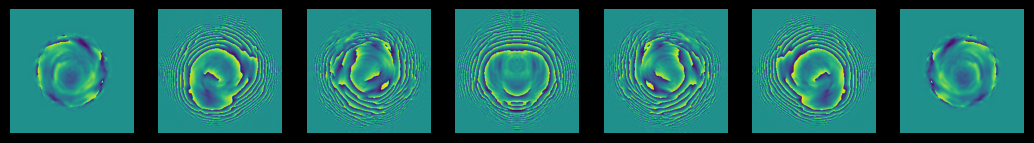

In [33]:
imode=1
plt.figure()
for iplane in range(planeCount):
    # MASKSCmplx[imask,(iplane),:,:]=np.transpose(MASKSCmplx[imask,(iplane),:,:])
    # MASKSCmplx[(iplane),:,:]=np.flip(MASKSCmplx[(iplane),:,:],axis=0)
    plt.subplot(1,8,iplane+1)
    # plt.imshow(np.angle((MASKSCmplx[11,(-1*iplane)-1,:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
    # plt.imshow(np.angle((MASKSCmplx[(iplane),:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
    plt.imshow(np.angle((MASKSCmplx_New[imode,(iplane),:,:])),cmap='viridis')
    
    plt.axis('off')

# Make so mask that have superpostions interwoven

In [2]:
filename=[
'LGGroup12_BW150nm_Best_MASK.mat',
'LGGroup12_BW150nm_superpos_Best_MASK.mat',
]
totalMasks=len(filename)
planeCount=7
modeCount=91*2
Nx=256  
Ny=256

# MASKSCmplxTempResized=np.zeros([planeCount,Ny,Nx],dtype=np.csingle)
MASKSCmplx_New=np.zeros([modeCount,planeCount,Ny,Nx],dtype=np.csingle)

# MASKSPhaseComplx=np.zeros([maskCount,planeCount,Ny,Nx],dtype=np.csingle)
Nxfile=320
Nyfile=320

xshift=(Nxfile-Nx)//2
yshift=(Nyfile-Ny)//2

xmin=xshift
xmax=Nxfile-xshift

ymin=yshift
ymax=Nyfile-yshift

FullPath="MPLC_MASK\\"+filename[0]
print(FullPath)
data = scipy.io.loadmat(FullPath)
MASKSCmplxFromFile = data['MASKS']

FullPath="MPLC_MASK\\"+filename[1]
print(FullPath)
data = scipy.io.loadmat(FullPath)
MASKSCmplxFromFile_sup = data['MASKS']


# for imode in range(modeCount):
for imode in range(91):
    # plt.figure(imode)
    imodeNew =imode*2
    for iplane in range(planeCount):
        MASKSCmplx_New[imodeNew,iplane,:,:] = np.copy(MASKSCmplxFromFile[imode,iplane,ymin:ymax,xmin:xmax])
        MASKSCmplx_New[imodeNew+1,iplane,:,:] = np.copy(MASKSCmplxFromFile_sup[imode,iplane,ymin:ymax,xmin:xmax])
        
        # plt.subplot(1,8,iplane+1)
        # plt.imshow(np.angle((MASKSCmplxFromFile[0,(iplane),:,:])),cmap='viridis')
        # plt.axis('off')
        
        

MPLC_MASK\LGGroup12_BW150nm_Best_MASK.mat
MPLC_MASK\LGGroup12_BW150nm_superpos_Best_MASK.mat


In [19]:
MASKSCmplxFromFile.shape

(91, 7, 320, 320)

In [27]:
MASKSCmplxFromFile[0,iplane,ymin:ymax,xmin:xmax].shape

(256, 256)

In [37]:
MASKSCmplx_New[1,:,:,:] = (MASKSCmplxFromFile[0,:,ymin:ymax,xmin:xmax])

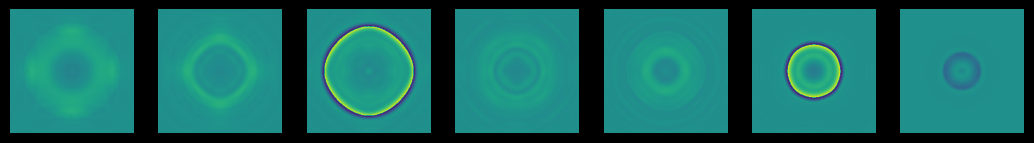

In [38]:
imode=1
plt.figure()
for iplane in range(planeCount):
    # MASKSCmplx[imask,(iplane),:,:]=np.transpose(MASKSCmplx[imask,(iplane),:,:])
    # MASKSCmplx[(iplane),:,:]=np.flip(MASKSCmplx[(iplane),:,:],axis=0)
    plt.subplot(1,8,iplane+1)
    # plt.imshow(np.angle((MASKSCmplx[11,(-1*iplane)-1,:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
    # plt.imshow(np.angle((MASKSCmplx[(iplane),:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
    plt.imshow(np.angle((MASKSCmplx_New[imode,(iplane),:,:])),cmap='viridis',vmin=-1*np.pi, vmax=np.pi)
    # plt.imshow(np.angle((MASKSCmplxFromFile[0,(iplane),:,:])),cmap='viridis',vmin=-1*np.pi, vmax=np.pi)
    

    plt.axis('off')

In [5]:
FullPath

'MPLC_MASK\\Qudits_d_2_LGGroup1_XGate_offset2510_Best_MASK.mat'

In [7]:
FullPath="MPLC_MASK\\"+filename[0]
data = scipy.io.loadmat(FullPath)
MASKSCmplx = data['MASKS']


In [8]:
MASKSCmplx.shape

(1, 7, 320, 320)

In [5]:
MaskDimsFromFile=np.shape(MASKSCmplx)
print(MaskDimsFromFile)

modeCountFromFile=MaskDimsFromFile[0]
planeCountFromFile=MaskDimsFromFile[1]
NyFromFile=MaskDimsFromFile[2]
NxFromFile=MaskDimsFromFile[3]

modeCountNew=1
Nx=256
Ny=256
# Nx=512
# Ny=512
# MaskCmplx=np.zeros((1,Dims[0],Nx_New,Ny_New),dtype=complex)
# test=MASKSCmplxTemp[:,Nx_New//2:(Nx-Nx_New//2),Ny_New//2:(Ny-Ny_New//2)]
# MaskCmplx[0,:,:,:]=test


shiftY=((NyFromFile-Ny)//2)
shiftX=((NxFromFile-Nx)//2)

MASKSCmplx=copy.deepcopy(MASKSCmplx)
MASKSCmplx_New= np.zeros([modeCountNew,planeCountFromFile,Ny,Nx],dtype=np.csingle)
for imode in range(modeCountFromFile):
    for iplane in range(planeCountFromFile):

            # MASKSCmplx_New[imode,iplane,:,:] = (MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX])
            # MASKSCmplx_New[imode,iplane,:,:] = (MASKSCmplx[imode,iplane,:,:])
            
            # MASKSCmplx_New[imode,iplane,:,:] = np.flip(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX],0)
            # MASKSCmplx_New[imode,iplane,:,:] =  np.flip(np.transpose(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX]),1)
            # MASKSCmplx_New[imode,iplane,:,:] = np.rot90(MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX],k=-1)
            MASKSCmplx_New[imode,iplane,:,:] = (MASKSCmplx[imode,iplane,shiftY:-shiftY,shiftX:-shiftX])
            
      

(1, 7, 320, 320)


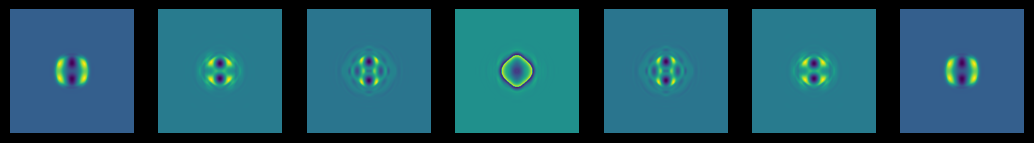

In [6]:
plt.figure()
for iplane in range(7):
    # MASKSCmplx[imask,(iplane),:,:]=np.transpose(MASKSCmplx[imask,(iplane),:,:])
    # MASKSCmplx[(iplane),:,:]=np.flip(MASKSCmplx[(iplane),:,:],axis=0)
    plt.subplot(1,8,iplane+1)
    # plt.imshow(np.angle((MASKSCmplx[11,(-1*iplane)-1,:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
    # plt.imshow(np.angle((MASKSCmplx[(iplane),:,:])),cmap='viridis',vmin=-1*math.pi, vmax=math.pi)
    plt.imshow(np.angle((MASKSCmplx[0,(iplane),:,:])),cmap='viridis')
    
    plt.axis('off')

In [1]:
import os

# Specify the folder path
folder_path = "MPLC_MASK\\"

output_file = 'file_list.txt'

# Get list of all files in the folder
file_names = os.listdir(folder_path)

# Optionally filter to include only files (not directories)
file_names = [f for f in file_names if os.path.isfile(os.path.join(folder_path, f))]

# Write the filenames to a text file
with open(output_file, 'w') as f:
    for name in file_names:
        f.write(name + '\n')

print(f"Saved {len(file_names)} filenames to {output_file}")

Saved 34 filenames to file_list.txt
